# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 120
pd.options.display.max_rows = 3000

# Loading data

In [2]:
df = pd.read_csv('../project_2/df_train_sub12.csv')

In [3]:
df.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,fbxgrla,frxgrla,nb_ranking,nbrkxgla,carsxara,rmagxgla,yrbxnbrk,yrrmxnbrk
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2958,0,1.4,2070.6,950.0,8874,2766.4,2807.0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4244,2122,2.0,4244.0,1118.0,16976,3992.0,3994.0


In [4]:
df.shape

(2050, 116)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Columns: 116 entries, id to yrrmxnbrk
dtypes: float64(16), int64(58), object(42)
memory usage: 1.8+ MB


In [6]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour',
       ...
       'neighborhood_Timber', 'neighborhood_Veenker', 'fbxgrla', 'frxgrla',
       'nb_ranking', 'nbrkxgla', 'carsxara', 'rmagxgla', 'yrbxnbrk',
       'yrrmxnbrk'],
      dtype='object', length=116)

In [7]:
df.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,fbxgrla,frxgrla,nb_ranking,nbrkxgla,carsxara,rmagxgla,yrbxnbrk,yrrmxnbrk
count,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2049.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.00000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.00000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,1474.098049,7.134975e+08,57.026829,57.924390,10067.220488,6.113171,5.561463,1971.721463,1984.206829,98.674634,442.300488,47.959024,567.728293,1057.987805,1164.619024,329.489756,5.515610,1499.624390,0.427317,0.063446,1.577561,0.371220,2.843902,1.042927,6.437073,0.591220,1868.688293,1.776098,473.535122,93.879512,47.580000,22.582927,2.592683,16.519512,2.399024,51.599512,6.220976,2007.775610,181519.686829,0.002927,0.009268,0.036585,0.013171,0.087805,0.034634,0.069756,0.056585,0.001463,0.000976,0.033659,0.000488,0.011707,0.040000,0.15122,0.008293,0.042439,0.023415,0.059512,0.079512,0.01561,0.054146,0.042439,0.063415,0.018537,0.023415,0.008293,2535.272195,1033.008293,2.022415,3153.802293,988.764878,10287.534146,3996.188756,4018.100561
std,844.181724,1.886914e+08,42.826865,33.132999,6743.517958,1.425855,1.104310,30.179906,21.027815,174.353604,461.204124,165.000901,444.954786,449.410704,396.499270,425.712712,51.081185,500.392368,0.522631,0.251705,0.549265,0.501098,0.826610,0.209839,1.559677,0.638539,454.241249,0.765352,216.145575,128.564062,66.755256,59.857633,25.235706,57.387043,37.791752,573.532756,2.744967,1.312325,79245.655820,0.054034,0.095848,0.187787,0.114033,0.283080,0.182896,0.254798,0.231105,0.038236,0.031227,0.180393,0.022086,0.107591,0.196007,0.35835,0.090708,0.201638,0.151253,0.236639,0.270603,0.12399,0.226361,0.201638,0.243767,0.134914,0.151253,0.090708,1556.338007,1300.991420,0.537710,1676.941192,739.510012,6111.510116,1096.437772,1088.682757
min,1.000000,5.263011e+08,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000

In [9]:
df['ovqxgla'] = df['overall_qual'] * df['gr_liv_area']

In [11]:
df['ovqxnbr'] = df['overall_qual'] * df['nb_ranking']

# Clean-up and EDA

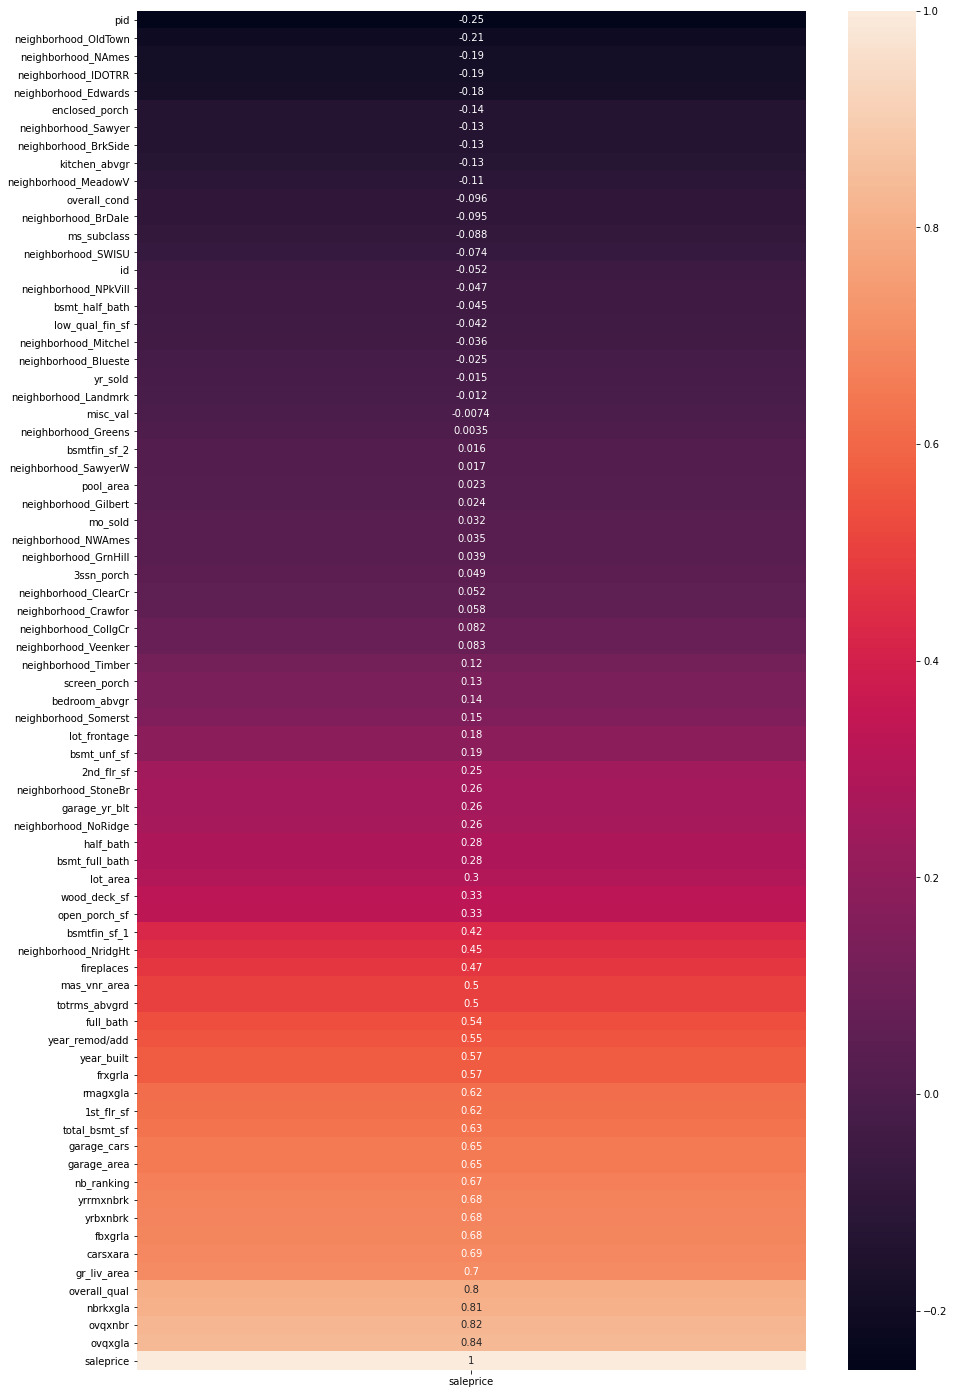

In [12]:
# sns.heatmap(df.corr()[['bpm']].sort_values('bpm'), annot = True)
plt.figure(figsize = (15, 25))

sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), annot = True);

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['nbrkxgla','overall_qual', 'nb_ranking', 'gr_liv_area', 'fbxgrla'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['garage_area', 'total_bsmt_sf','1st_flr_sf', 'frxgrla'])

In [ ]:
sns.pairplot(df, y_vars=['saleprice'], x_vars=['year_built', 'year_remod/add', 'totrms_abvgrd', 'garage_cars'])

In [54]:
df.to_csv('df_train_sub15.csv', index = False)

In [134]:
dffpoly = df[['overall_qual', 'gr_liv_area', 'nb_ranking', 'garage_area', 'garage_cars', 
              'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath', 
              'totrms_abvgrd', 'mas_vnr_area', 'fireplaces', 'bsmtfin_sf_1', 'open_porch_sf',
              'wood_deck_sf', 'lot_area', 'saleprice']]

In [135]:
dffpoly.head()

,overall_qual,gr_liv_area,nb_ranking,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,totrms_abvgrd,mas_vnr_area,fireplaces,bsmtfin_sf_1,open_porch_sf,wood_deck_sf,lot_area,saleprice
0,6,1479,1.40,475.0,2.0,725.0,725,1976,2005,2,6,289.0,0,533.0,44,0,13517,130500
1,7,2122,2.00,559.0,2.0,913.0,913,1996,1997,2,8,132.0,1,637.0,74,0,11492,220000
2,5,1057,1.90,246.0,1.0,1057.0,1057,1953,2007,1,5,0.0,0,731.0,52,0,7922,109000
3,5,1444,2.85,400.0,2.0,384.0,744,2006,2007,2,7,0.0,0,0.0,0,100,9802,174000
4,6,1445,2.00,484.0,2.0,676.0,831,1900,1993,2,6,0.0,0,0.0,59,0,14235,138500


In [136]:
dffpoly.to_csv('dfforpoly.csv', index = False)

# Define Feature Matrix & Target

In [28]:
features = ['nbrkxgla','nb_ranking', 'gr_liv_area', 'total_bsmt_sf',
            '1st_flr_sf', 'frxgrla', 'year_built', 'year_remod/add', 'carsxara', 'ovqxgla', 'ovqxnbr']

In [34]:
df[features].isnull().sum()

nbrkxgla          0
nb_ranking        0
gr_liv_area       0
total_bsmt_sf     0
1st_flr_sf        0
frxgrla           0
year_built        0
year_remod/add    0
carsxara          0
ovqxgla           0
ovqxnbr           0
dtype: int64

In [35]:
y = df['saleprice']
X = df[features]

In [36]:
lr = LinearRegression()

## Enable Statesmodel

In [37]:
import statsmodels.api as sm

In [38]:
X = sm.add_constant(X, prepend=True)
    ## adding constant 1 
results = sm.OLS(y, X).fit()

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1038.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:55:35   Log-Likelihood:                -24098.
No. Observations:                2050   AIC:                         4.822e+04
Df Residuals:                    2038   BIC:                         4.829e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.546e+05   8.45e+04    -11.302      0.000   -1.12e+06   -7.89e+05
nbrkxgla          30.0436      2.309     13.012      0.000      25.515      34.572
nb_ranking     -8.895e+04   6091.367    -14.603      0.000   -1.01e+05    -7.7e+04
gr_liv_area      -21.8363      7.197     -3.034      0.002     -35.950      -7.723
total_bsmt_sf     15.3802      2.805      5.484      0.000       9.880      20.880
1st_flr_sf        16.6495      3.248      5.126      0.000      10.279      23.020
frxgrla            6.5897      0.759      8.679      0.000       5.101       8.079
year_built       153.6415     33.218      4.625      0.000      88.497     218.786
year_remod/add   399.0786     45.013      8.866      0.000     310.802     487.355
carsxara          15.4940      1.274     12.166      0.000      12.996      17.992
ovqxgla           -2.0309      0.888     -2.288      0.022      -3.772      -0.290
ovqxnbr         9418.9318    683.624     13.778      0.000    8078.257    1.08e+04
==============================================================================
Omnibus:                      666.588   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36915.651
Skew:                          -0.714   Prob(JB):                         0.00
Kurtosis:                      23.740   Cond. No.                     1.48e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
X.columns

Index(['const', 'nbrkxgla', 'nb_ranking', 'gr_liv_area', 'total_bsmt_sf',
       '1st_flr_sf', 'frxgrla', 'year_built', 'year_remod/add', 'carsxara',
       'ovqxgla', 'ovqxnbr'],
      dtype='object')

In [90]:
X = X.drop(columns = 'const')

In [91]:
X.columns

Index(['nbrkxgla', 'nb_ranking', 'gr_liv_area', 'total_bsmt_sf', '1st_flr_sf',
       'frxgrla', 'year_built', 'year_remod/add', 'carsxara', 'ovqxgla',
       'ovqxnbr'],
      dtype='object')

In [92]:
# Cross-validation gives a negative average R^2?!

# 
from sklearn.model_selection import KFold
cv_scores = cross_val_score(lr, X, y, cv=KFold(5, shuffle=True))

cv_scores = cross_val_score(lr, X, y, cv=5)
print(cv_scores.mean())

0.8415583756024316


#### Train-Test-Split

In [93]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 308)

## Standardscaler transform

ss = StandardScaler()

ss.fit(X_train)

X_train_sc = ss.transform(X_train)

X_valid_sc = ss.transform(X_valid)

#### Instantiate, Fit, Score Model

In [94]:
lr.fit(X_train, y_train)

LinearRegression()

In [95]:
lr.score(X_train, y_train)

0.8563445472973982

In [96]:
cross_val_score(lr, X_train, y_train)

array([0.83682477, 0.85066446, 0.87837285, 0.88883646, 0.75047594])

In [97]:
cross_val_score(lr, X_train, y_train).mean()

0.841034896011314

cross_val_score(lr, X_valid, y_valid)

cross_val_score(lr, X_valid, y_valid).mean()

lr.score(X_train, y_train), lr.score(X_valid, y_valid)

In [ ]:
list(zip(X.columns, lr.coef_))

#### Now we have a model object, and we can run our df_test data through it

# Prep df_test data

In [98]:
df_test = pd.read_csv('../project_2/df_test_sub12.csv')

In [99]:
df.shape

(2050, 118)

In [101]:
df_test['ovqxgla'] = df_test['overall_qual'] * df_test['gr_liv_area']

In [102]:
df_test['ovqxnbr'] = df_test['overall_qual'] * df_test['nb_ranking']

In [103]:
df_test.shape

(878, 118)

df_test['nb_ranking'] = df_test['neighborhood'].map({'Blueste':1.6, 'BrDale':1, 'BrkSide': 1.35, 'ClearCr': 2.35,
                                          'CollgCr':2.5, 'Crawfor':2.5, 'Edwards': 1.7, 'Gilbert': 2.1,
                                           'Greens': 1.95, 'GrnHill':3, 'IDOTRR':1.05, 'Landmrk':1.5,
                                           'MeadowV':1.25, 'Mitchel':1.45, 'NAmes':1.9, 'NPkVill':1.35,
                                           'NWAmes':2.05, 'NoRidge':3.4, 'NridgHt':2.7, 'OldTown':1.85,
                                           'SWISU':1.45, 'Sawyer':1.4, 'SawyerW':2, 'Somerst':2.15,
                                           'StoneBr':3.6, 'Timber':2.85, 'Veenker':2.6, 'Blmngtn':2.1})

df_test['nb_ranking'].sort_values().value_counts()

df_test['nbrkxgla'] = df_test['nb_ranking'] * df_test['gr_liv_area']

df_test['fbxgrla'] = df_test['full_bath'] * df_test['gr_liv_area']

df_test['frxgrla'] = df_test['fireplaces'] * df_test['gr_liv_area']

In [104]:
df_test[features].isnull().sum()

nbrkxgla          0
nb_ranking        0
gr_liv_area       0
total_bsmt_sf     0
1st_flr_sf        0
frxgrla           0
year_built        0
year_remod/add    0
carsxara          0
ovqxgla           0
ovqxnbr           0
dtype: int64

In [105]:
df_test.to_csv('df_test_sub15.csv', index = False)

In [140]:
dftestpoly = df_test[['id', 'overall_qual', 'gr_liv_area', 'nb_ranking', 'garage_area', 'garage_cars', 
              'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add', 'full_bath', 
              'totrms_abvgrd', 'mas_vnr_area', 'fireplaces', 'bsmtfin_sf_1', 'open_porch_sf',
              'wood_deck_sf', 'lot_area']]

In [141]:
dftestpoly.head()

,id,overall_qual,gr_liv_area,nb_ranking,garage_area,garage_cars,total_bsmt_sf,1st_flr_sf,year_built,year_remod/add,full_bath,totrms_abvgrd,mas_vnr_area,fireplaces,bsmtfin_sf_1,open_porch_sf,wood_deck_sf,lot_area
0,2658,6,1928,1.85,440,1,1020,908,1910,1950,2,9,0.0,0,0,60,0,9142
1,2718,5,1967,1.40,580,2,1967,1967,1977,1977,2,10,0.0,0,0,0,170,9662
2,2414,7,1496,2.10,426,2,654,664,2006,2006,2,7,0.0,1,554,24,100,17104
3,1989,5,968,1.85,480,2,968,968,1923,2006,1,5,0.0,0,0,0,0,8520
4,625,6,1394,1.90,514,2,1394,1394,1963,1963,1,6,247.0,2,609,76,0,9500


In [142]:
dftestpoly.to_csv('dftestpoly.csv', index = False)

In [139]:
dftestpoly.shape

(878, 17)

In [106]:
df_test.shape

(878, 118)

#### Make sure there aren't any nulls in the columns we used in the model:

In [107]:
X_TEST = df_test[features]

In [108]:
X.shape

(2050, 11)

In [109]:
X_TEST.shape

(878, 11)

X_TEST_SC = ss.transform(X_TEST)

#### Create Predictions

In [110]:
df_test['y_hat'] = lr.predict(X_TEST)

In [111]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_GrnHill,neighborhood_Landmrk,y_hat,fbxgrla,frxgrla,nb_ranking,nbrkxgla,carsxara,yrrmxnbrk,yrbxnbrk,rmagxgla,ovqxgla,ovqxnbr
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,136886.269271,3856,0,1.85,3566.8,440,3607.5,3533.50,17352,11568,11.10
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,181520.320038,3934,0,1.40,2753.8,1160,2767.8,2767.80,19670,9835,7.00
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191152.742231,2992,1496,2.10,3141.6,852,4212.6,4212.60,10472,10472,14.70
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,131983.727452,968,0,1.85,1790.8,960,3711.1,3557.55,4840,4840,9.25
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,182542.154663,1394,2788,1.90,2648.6,1028,3729.7,3729.70,8364,8364,11.40


In [112]:
df_test.shape

(878, 118)

# Create Submission and check the result

In [115]:
nars_submission = df_test[['id', 'y_hat']]
nars_submission.head()

,id,y_hat
0,2658,136886.269271
1,2718,181520.320038
2,2414,191152.742231
3,1989,131983.727452
4,625,182542.154663


In [116]:
# Check submission shpe
nars_submission.shape

(878, 2)

# Rename columns of the fisrt submission

In [117]:
nars_submission.rename(columns = {'id' : 'Id',
                                     'y_hat' : 'SalePrice'}, inplace = True)

/Users/narschang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [118]:
nars_submission.shape

(878, 2)

In [119]:
nars_submission.head()

,Id,SalePrice
0,2658,136886.269271
1,2718,181520.320038
2,2414,191152.742231
3,1989,131983.727452
4,625,182542.154663


#### Export as a CSV

In [120]:
nars_submission.to_csv('nars_submission_15.csv', index = False)

# Sample submission reference

sample_submission = pd.read_csv('sample_sub_reg.csv')
sample_submission.shape

sample_submission.head()

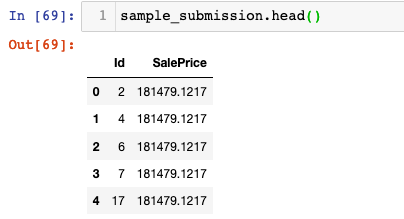